# Project: TMDb Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### About the data set

The original source of this data is from Kaggle - https://www.kaggle.com/tmdb/tmdb-movie-metadata. It contains ratings, revenue, cast, genre, release date etc. for about 10,000 movies. Using this dataset, you can find interesting patterns like genres associated with higher revenues, movies with better ratings etc. In today's world, where the entertainment industry is a major player, knowing which movies are profitable/rated high can be a game changer.

### Questions to answer

This dataset can be used to answer a lot of questions but the two I am focusing on this report are:

Q1: Does a movie have a better rating if more people rate the movie? Is there a correlation between number of votes and vote rating?

Q2: What kind of properties are associated with higher revenue movies? 

### Import necessary libraries

In [88]:
#We will need pandas and matplotlib for sure. But importing a few others in case they are needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #for cleaner visualizations/grids in plots
%matplotlib inline 
#to display visualizations inline

<a id='wrangling'></a>
## Data Wrangling


### Load the data

After loading the data, there are columns like id, imdb_id that could have been used as index but I checked that there are duplicates (using .is_unique), so we are not going to use columns like that. Dropping them in the next section.

In [89]:
#Read the CSV file and take a peek
movies_df = pd.read_csv('tmdb-movies.csv')
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### General properties

It will be interesting to understand the size/shape of the data, statistics about key columns, understanding which columns are useful etc. This is what we will be doing in this section.

In [90]:
#Dimensions of data
movies_df.shape #10K movies with 21 columns

(10866, 21)

In [91]:
#General summary
movies_df.describe() #average rating is 5.97 with highest at 9.2 (The Story of Film: An Odyssey) and lowest at 1.5 (Transmorphers)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


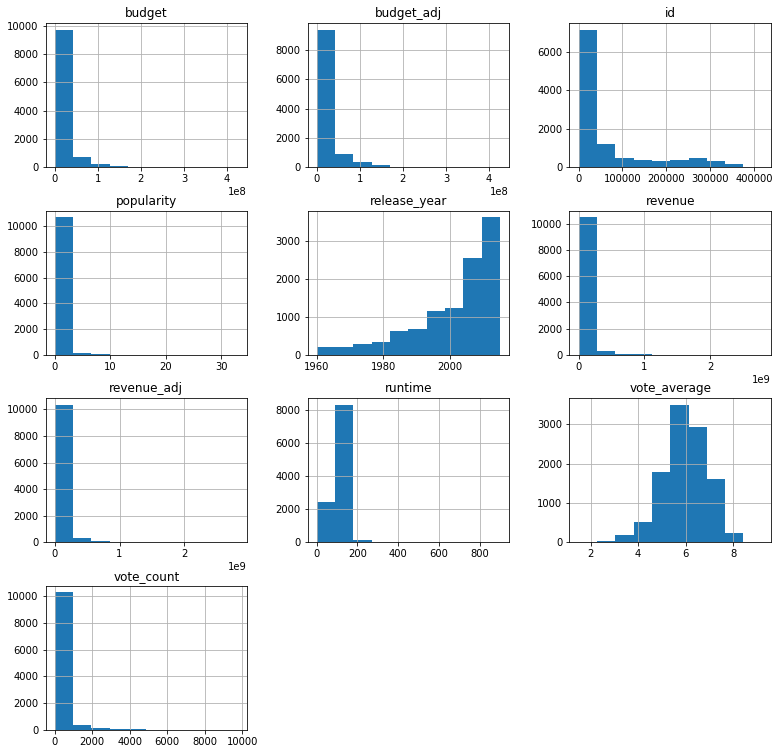

In [74]:
#Histogram of variables. vote_average is the only normally distributed variable!
movies_df.hist(figsize=(13,13));

In [75]:
#Data type and missing values
movies_df.info() #some variables like homepage, tagline etc. have lots of NULLs but do not seem too important

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [92]:
#Duplicates?
movies_df.duplicated().sum() #only 1 duplicate?!
movies_df[movies_df.duplicated()] #TEKKEN movie

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Data cleaning

Now that we have a good understanding of how the data looks, in this section, we will drop unnecessary columns, impute missing values, handle duplicates etc. to get our data set in shape for researching our proposed questions!

In [94]:
#Drop columns we do not need. Some are irrelevant and some have too many missing values anyway
movies_df.drop(['id','imdb_id','homepage','production_companies','keywords','tagline'], axis = 1, inplace = True)

In [95]:
#Check records with missing data. 
#76 records 
#Three columns have NULL values: cast, director, genres but it is not too much to drop them right away.
movies_df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [96]:
#However there are lots of 0's in some fields which are technically NaN. Replacing them here.
movies_df['revenue_adj'].replace(0, np.NAN, inplace=True)
movies_df['revenue'].replace(0, np.NAN, inplace=True)
movies_df['budget_adj'].replace(0, np.NAN, inplace=True)
movies_df['budget'].replace(0, np.NAN, inplace=True)
movies_df['runtime'].replace(0, np.NAN, inplace=True)

In [100]:
#checking NULL count now.
movies_df.isnull().sum()

#Revenue/Budget fields have lot of NULL values (6/10 k), so we will drop them from a copy of this dataset 
#since they can be NULL if we are exploring only other variables. So essentially we will have two datasets here

# One dataset with NULL values dropped only in the runtime/genres column. Count will be around 10K. 
#This will be used for analyzing anything other than revenue/budget

# Another dataset with NULL values dropped across all columns. Count will be around 4K. 
#This will be used if analyzing revenue/budget fields

popularity           0
budget            5696
revenue           6016
original_title       0
cast                76
director            44
overview             4
runtime             31
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

In [101]:
#clean revenue dataset by dropping all NaN values
movies_df_rev = movies_df.copy()

In [105]:
movies_df_rev.dropna(inplace=True)

In [110]:
#clean normal dataset by dropping NaN only in key fields
movies_df.dropna(subset = ['runtime','genres'], inplace=True)

In [111]:
#Checking counts once to be sure
movies_df_rev.shape

(3850, 15)

In [112]:
movies_df.shape

(10813, 15)

In [113]:
#Drop duplicated records - movies_df_rev
movies_df_rev.drop_duplicates(inplace = True)
movies_df_rev.shape

(3849, 15)

In [114]:
#Drop duplicated records - movies_df
movies_df.drop_duplicates(inplace = True)
movies_df.shape

(10812, 15)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 - Does a movie have a better rating if more people rate the movie? Is there a correlation between number of votes and vote rating?

In [128]:
#Create a separate dataset with only those two columns
movies_df_vote = movies_df.loc[:, 'vote_count' : 'vote_average']

In [129]:
#Explore the variables. Vote count goes from 10 to 9767 and the 75% is at 146, so there is a lot of variation
movies_df_vote.describe()

,vote_count,vote_average
count,10812.000000,10812.000000
mean,218.369404,5.975379
std,576.886018,0.934122
min,10.000000,1.500000
25%,17.000000,5.400000
50%,38.000000,6.000000
75%,146.000000,6.600000
max,9767.000000,9.200000


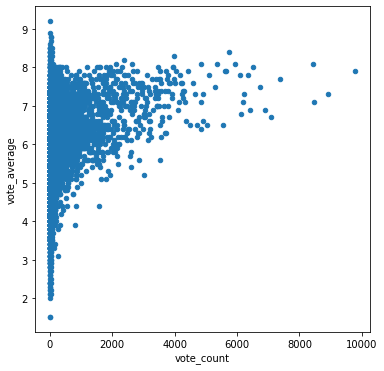

In [132]:
#Plot the relationship. 
movies_df_vote.plot(x='vote_count', y='vote_average', kind='scatter', figsize = (6,6));

Looking at the above graph, there is a minor positive correlation between the two variables but it is not a very strong correlation. Checking non-visually below.

In [133]:
movies_df_vote.corr()
#there is a 0.25 positive correlation confirming that there exists a weak positive relationship

,vote_count,vote_average
vote_count,1.000000,0.254633
vote_average,0.254633,1.000000


### Question 2 - What kind of properties are associated with higher revenue movies? 

In [139]:
#Getting rid of scientific notation first
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Look at the revenue column first in the cleaned revenue dataset. Highest revenue movie is $ 2B and lowest (which is probably incorrect) is 2$
movies_df_rev['revenue_adj'].describe()

count         3849.00
mean     137231318.62
std      216201762.38
min              2.37
25%       18430229.34
50%       61813934.33
75%      163411533.62
max     2827123750.41
Name: revenue_adj, dtype: float64

In [144]:
#Let's call everything above 50% as 'High Revenue' ('H') and create a new column to tag that
movies_df_rev['revenue_level'] = pd.qcut(movies_df_rev['revenue_adj'], q=2, labels = ['L','H'])

In [146]:
#Check distribution and the binning logic
movies_df_rev['revenue_level'].value_counts()

L    1925
H    1924
Name: revenue_level, dtype: int64

In [148]:
movies_df_rev.groupby(['revenue_level']).revenue_adj.min() #matches the distribution above

revenue_level
L          2.37
H   61830009.23
Name: revenue_adj, dtype: float64

In [149]:
movies_df_rev.groupby(['revenue_level']).revenue_adj.max() #matches the distribution above

revenue_level
L     61813934.33
H   2827123750.41
Name: revenue_adj, dtype: float64

In [152]:
#Drop other revenue columns and irrelevant columns
movies_df_rev.drop(['revenue','revenue_adj','release_year'], axis=1, inplace=True)

In [155]:
#Compare different variables with the two revenue classifications
movies_df_rev.groupby(['revenue_level']).mean()

,popularity,budget,runtime,vote_count,vote_average,budget_adj
revenue_level,,,,,,
L,0.69,18869370.57,104.81,186.82,6.01,22793768.67
H,1.70,55637902.14,113.63,870.13,6.32,65804609.15


As you can see from the above table, there are clear differntiators between a low/high revenue movie. High revenue movies have a bigger budget, are slighly longer, and more popular!

In [168]:
#Plotting them visually
revPlot = movies_df_rev.groupby(['revenue_level']).mean()
revPlot

,popularity,budget,runtime,vote_count,vote_average,budget_adj
revenue_level,,,,,,
L,0.69,18869370.57,104.81,186.82,6.01,22793768.67
H,1.70,55637902.14,113.63,870.13,6.32,65804609.15


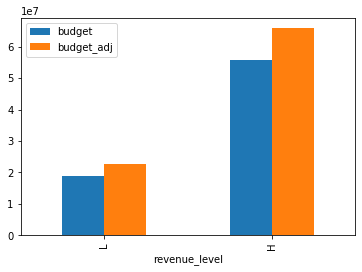

In [174]:
#Plot budget first
revPlot.plot(y = ["budget", "budget_adj"], kind='bar');

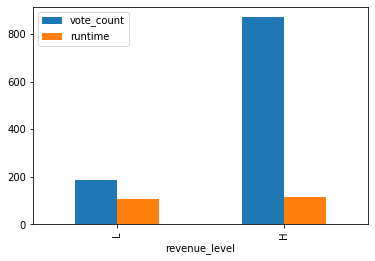

In [172]:
#Plot vote count and run time
revPlot.plot(y = ["vote_count", "runtime"], kind='bar');

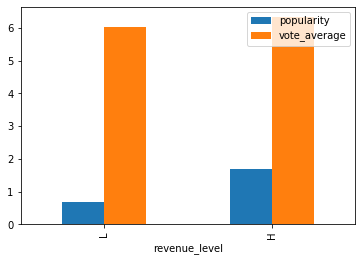

In [175]:
#Plot popularity and vote average
revPlot.plot(y = ["popularity", "vote_average"], kind='bar');

<a id='conclusions'></a>
## Conclusions

In summary, we have downloaded the movies dataset in this project, cleaned it up a bit, and generated some initial findings based on earlier shown hypotheses. There are many other questions you can answer with this dataset like what genres are more popular, how did that change over time, which director produces good movies etc. 

Given the small sample size here (compared to the entire movie universe) and absence of statistics to validate the significance of our results, these results are considered directional only. However, it is important to keep oneself aware of the kind of insights we can draw from such a dataset.